In [18]:
install.packages('agricolae')

Installing agricolae [1.3-7] ...
	OK [linked cache]


# Data analysis in Split plot design with 1 main plot factor and 1 in sub plot with 3 replication

A researcher was interested to compare 2 varieties of coffee and three seedling age (2 weeks old, 3 weeks old & 4 weeks old). An experiment was conducted in a completely randomized design with 3 replications while varieties were kept in the main plot and seedlings age in subplots.

The response variable was recorded as time in days from heading to maturity of rice plants (heading)

In [19]:
library(agricolae)

 Importing data

In [20]:
data <- read.csv(file = "data_split.csv", 
                 header = TRUE)

In [21]:
head(data)

,X,block,var,age,heading
,<int>,<dbl>,<chr>,<chr>,<dbl>
1,0,1,WH505,2W,89
2,1,1,WH505,3W,94
3,2,1,WH505,4W,96
4,3,1,KH600-15A,2W,75
5,4,1,KH600-15A,3W,80
6,5,1,KH600-15A,4W,84


In [22]:
str(data)

'data.frame':	24 obs. of  5 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ block  : num  1 1 1 1 1 1 2 2 2 2 ...
 $ var    : chr  "WH505" "WH505" "WH505" "KH600-15A" ...
 $ age    : chr  "2W" "3W" "4W" "2W" ...
 $ heading: num  89 94 96 75 80 84 85 99 101 72 ...


changing the chr variables to factor

In [23]:
data$var = as.factor(data$var)
data$age = as.factor(data$age)
str(data)

'data.frame':	24 obs. of  5 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ block  : num  1 1 1 1 1 1 2 2 2 2 ...
 $ var    : Factor w/ 2 levels "KH600-15A","WH505": 2 2 2 1 1 1 2 2 2 1 ...
 $ age    : Factor w/ 3 levels "2W","3W","4W": 1 2 3 1 2 3 1 2 3 1 ...
 $ heading: num  89 94 96 75 80 84 85 99 101 72 ...


In [24]:
attach(data)

The following objects are masked from data (pos = 3):

    age, block, heading, var, X




Fitting the analysis of variance model for split-plot design 

varieties(var) were kept in the main plot 
**and** 
seedlings age (age) in subplots
Response variable Y = heading
Block is the replication variable name from data set

In [25]:
model <- sp.plot(block = block, 
                 pplot = var, 
                 splot = age, 
                 Y = heading)


ANALYSIS SPLIT PLOT:  heading 
Class level information

var 	:  WH505 KH600-15A 
age 	:  2W 3W 4W 
block 	:  1 2 3 4 

Number of observations:  24 

Analysis of Variance Table

Response: heading
        Df  Sum Sq Mean Sq F value    Pr(>F)    
block    3   28.46    9.49  1.3185   0.31393    
var      1 1365.04 1365.04 63.5314   0.00412 ** 
Ea       3   64.46   21.49                      
age      2  641.33  320.67 44.5714 2.789e-06 ***
var:age  2   16.33    8.17  1.1351   0.35359    
Eb      12   86.33    7.19                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

cv(a) = 5.4 %, cv(b) = 3.1 %, Mean = 85.45833 



The analysis of variance table shows that both the main effects significantly affected the time taken from heading to maturity in rice, P value for var and age < 0.05. While the interaction is not significant regarding days from heading to maturity, . However, P value for var:age > 0.05 

......................#########....................

Mean comparison test for both individual treatment and interaction effect JUST IN CASEe you get the significant effect of the interaction term.

##Mean separation test using LSD.test() function 
First you need to assign Edf_a as the value of first error degree of freedom for main plot factor. Similarly, assign Edf_b to represent error degree of freedom for the subplot factor and interaction term before proceeding for mean separation test  

In [26]:
# Get first error df
Edf_a <- model$gl.a
Edf_a
# Get second error df
Edf_b <- model$gl.b
Edf_b
# Get first error MS
EMS_a <- model$Ea
EMS_a
# Get second error MS
EMS_b <- model$Eb
EMS_b

[1] 3

[1] 12

[1] 21.48611

[1] 7.194444

##LSD test on main effects main plot factor and subplot factor

LSD test on main effects
For main plot factor i.e. varieties LSD.test() function require some arguments to be specified. In Y argument specify the response variable name (heading). The trt argument specify the main plot factor that is varieties (var) in this case. For DFerror and MSerror arguments specify the main plot error df (Edf_a) and error MS (EMS_a).

Keep the alpha level at 5 percent. For p.adj argument you can specify different methods. I will use the mostly commonly used method bonferroni. Type TRUE for group argument to get the mean values with letters showing the rank of each treatment level.

In [27]:
out1 <- LSD.test(y = heading, 
                 trt = var,
                 DFerror = Edf_a, 
                 MSerror = EMS_a,
                 alpha = 0.05,
                 p.adj = "bonferroni",
                 group = TRUE,
                 console = TRUE)


Study: heading ~ var

LSD t Test for heading 
P value adjustment method: bonferroni 

Mean Square Error:  21.48611 

var,  means and individual ( 95 %) CI

           heading      std  r       se      LCL      UCL Min Max   Q25  Q50
KH600-15A 77.91667 5.550730 12 1.338099 73.65824 82.17510  67  87 74.75 79.0
WH505     93.00000 6.728501 12 1.338099 88.74157 97.25843  81 101 88.00 93.5
            Q75
KH600-15A 81.25
WH505     99.00

Alpha: 0.05 ; DF Error: 3
Critical Value of t: 3.182446 

Minimum Significant Difference: 6.022327 

Treatments with the same letter are not significantly different.

           heading groups
WH505     93.00000      a
KH600-15A 77.91667      b


Mean separation test using LSD.test() for Subplot factor

Similarly, for Subplot factor just change the values of trt, DFerror and MSerror arguments

In [28]:
out2 <- LSD.test(y = heading, 
                 trt = age,
                 DFerror = Edf_b, 
                 MSerror = EMS_b,
                 alpha = 0.05,
                 p.adj = "bonferroni",
                 group = TRUE,
                 console = TRUE)


Study: heading ~ age

LSD t Test for heading 
P value adjustment method: bonferroni 

Mean Square Error:  7.194444 

age,  means and individual ( 95 %) CI

   heading      std r        se      LCL      UCL Min Max   Q25  Q50   Q75
2W  78.625 7.558108 8 0.9483172 76.55879 80.69121  67  89 74.25 78.0 85.00
3W  86.625 9.117291 8 0.9483172 84.55879 88.69121  74  99 79.75 87.0 93.25
4W  91.125 9.093758 8 0.9483172 89.05879 93.19121  79 101 83.50 91.5 99.50

Alpha: 0.05 ; DF Error: 12
Critical Value of t: 2.779473 

Minimum Significant Difference: 3.727616 

Treatments with the same letter are not significantly different.

   heading groups
4W  91.125      a
3W  86.625      b
2W  78.625      c


LSD test on interaction term

Keep all the arguments same as used in subplot factor for LSD test except the trt argument

In [29]:
out3 <- LSD.test(y = heading, 
                 trt = var:age,
                 DFerror = Edf_b, 
                 MSerror = EMS_b,
                 alpha = 0.05,
                 p.adj = "bonferroni",
                 group = TRUE,
                 console = TRUE)


Study: heading ~ var:age

LSD t Test for heading 
P value adjustment method: bonferroni 

Mean Square Error:  7.194444 

var:age,  means and individual ( 95 %) CI

             heading      std r       se      LCL       UCL Min Max   Q25   Q50
KH600-15A:2W   72.25 3.774917 4 1.341123 69.32794  75.17206  67  75 70.75  73.5
KH600-15A:3W   78.50 3.109126 4 1.341123 75.57794  81.42206  74  81 77.75  79.5
KH600-15A:4W   83.00 3.366502 4 1.341123 80.07794  85.92206  79  87 81.25  83.0
WH505:2W       85.00 3.265986 4 1.341123 82.07794  87.92206  81  89 84.00  85.0
WH505:3W       94.75 2.872281 4 1.341123 91.82794  97.67206  93  99 93.00  93.5
WH505:4W       99.25 2.362908 4 1.341123 96.32794 102.17206  96 101 98.25 100.0
                Q75
KH600-15A:2W  75.00
KH600-15A:3W  80.25
KH600-15A:4W  84.75
WH505:2W      86.00
WH505:3W      95.25
WH505:4W     101.00

Alpha: 0.05 ; DF Error: 12
Critical Value of t: 3.648889 

Minimum Significant Difference: 6.920609 

Treatments with the same letter 

Plot variation
For variation argument specify IQR or specify the range or variance

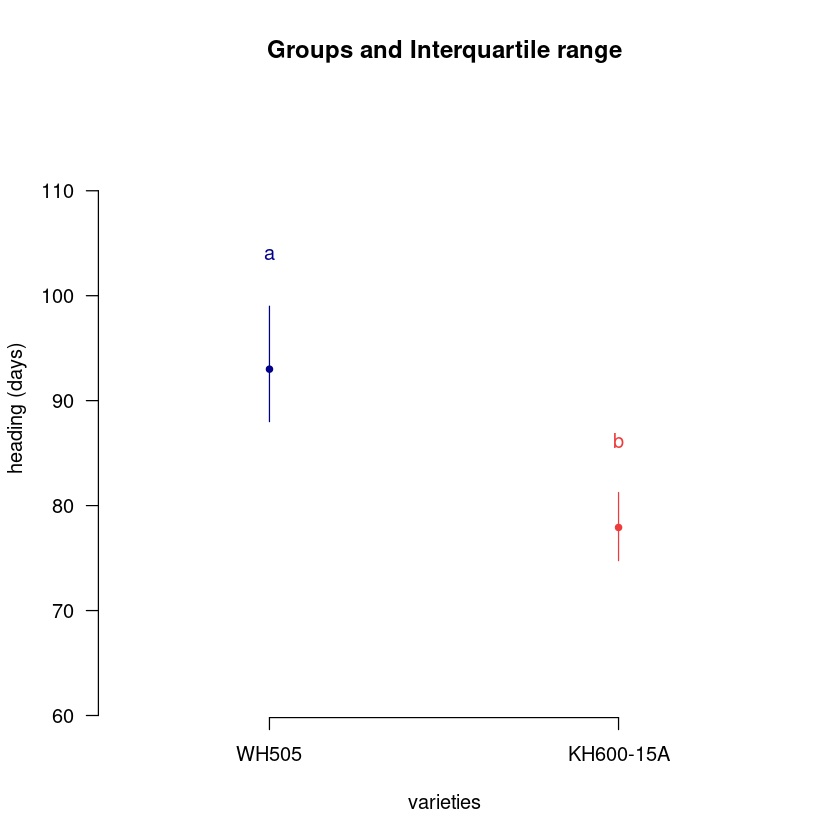

In [30]:
plot(out1, 
     xlab = "varieties",
     ylab = "heading (days)",
     las = 1, 
     variation = "IQR")

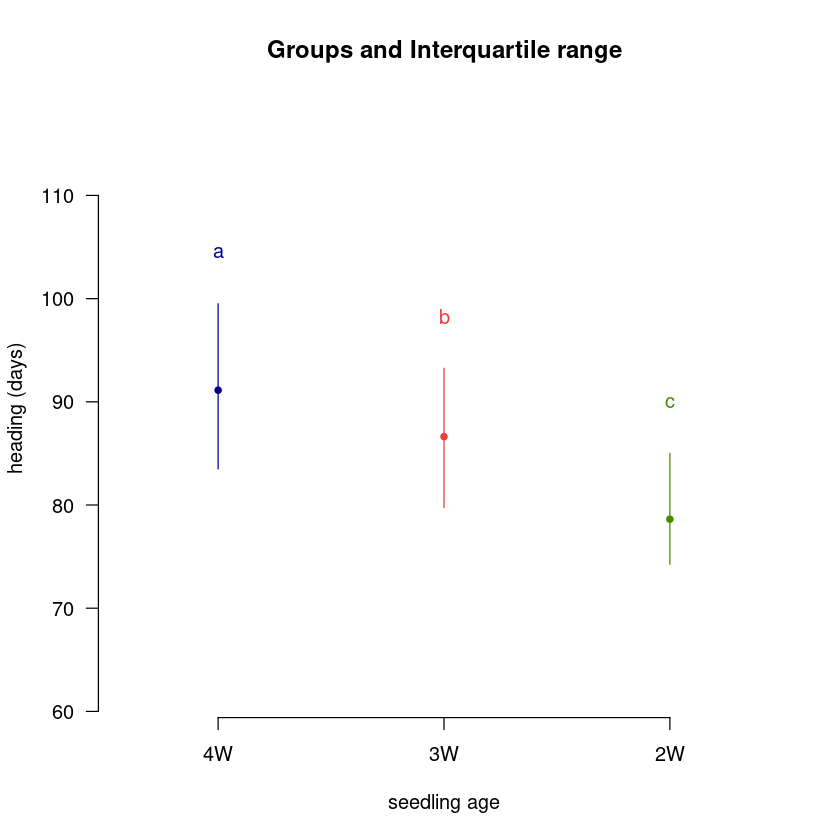

In [31]:
plot(out2, 
     xlab = "seedling age",
     ylab = "heading (days)",
     las = 1, 
     variation = "IQR")

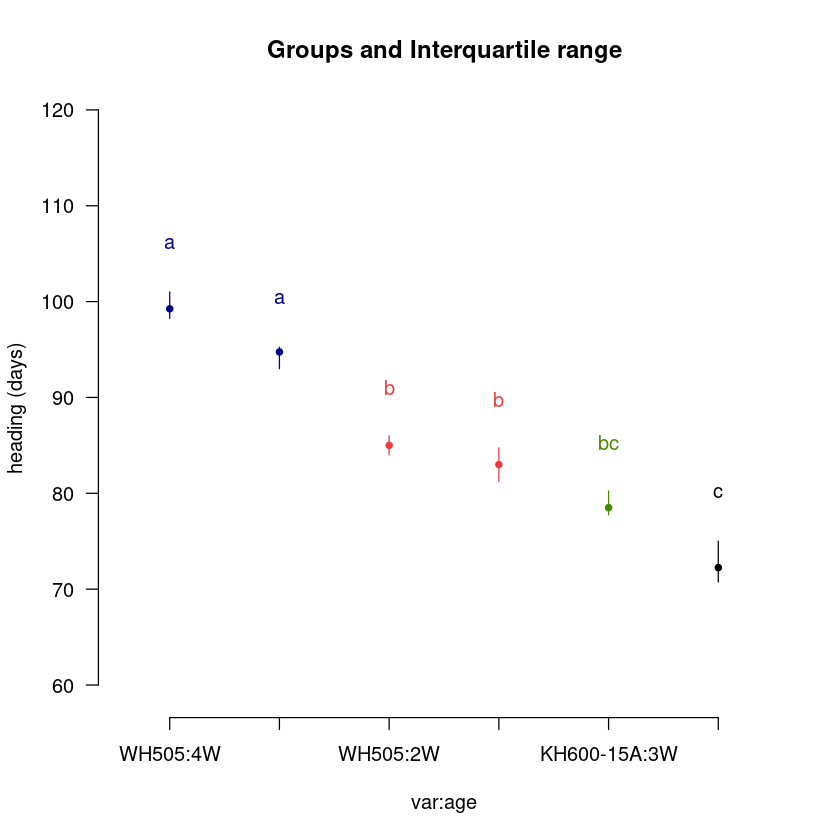

In [32]:
plot(out3, 
     xlab = "var:age",
     ylab = "heading (days)",
     las = 1, 
     variation = "IQR")

##Main effects
##Plot bargraph with standard error bars
Use bar.error() function and in parenthesis type out1$means to get means for the height of the bars. In variation argument specify standard error variation = "SE" as source for error bars.

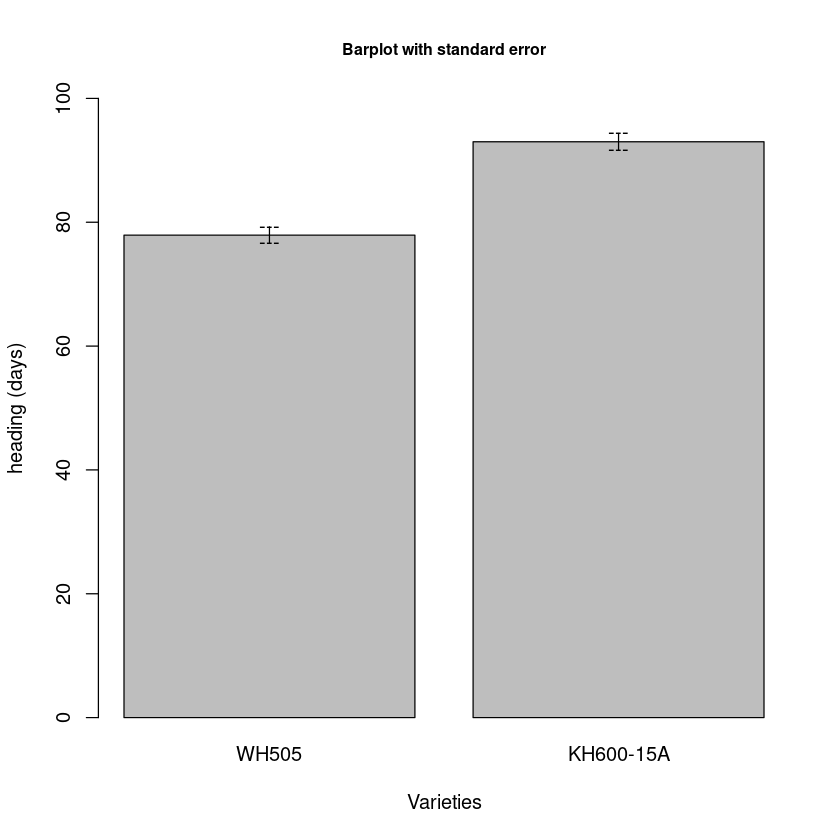

In [34]:
# Main plot factor (varieties)
bar.err(out1$means, 
        variation = "SE", 
        ylim = c(0, 100),
        names.arg = c("WH505","KH600-15A"))

# Adding title, X and Y labels
title(main = "Barplot with standard error",
      cex.main = 0.8,
      xlab = "Varieties", 
      ylab = "heading (days)")

Bargraph for subplot factor  

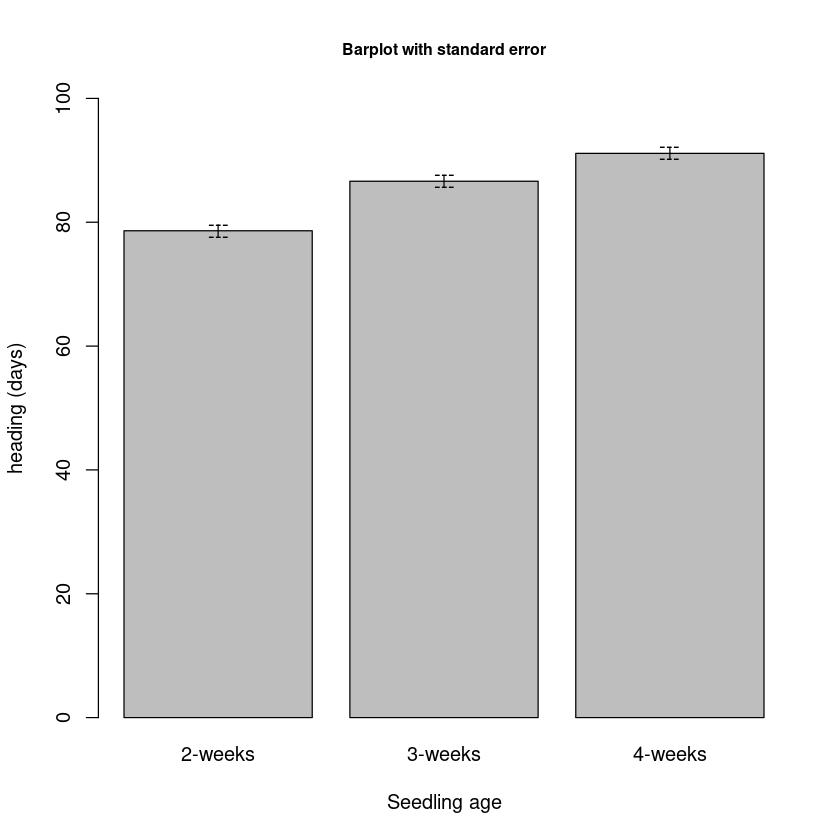

In [35]:
# Sub-plot factor (seedling age)
bar.err(out2$means, 
        variation = "SE", 
        ylim = c(0, 100),
        names.arg = c("2-weeks", "3-weeks", "4-weeks"))

# Adding title, X and Y labels
title(main = "Barplot with standard error",
      cex.main = 0.8,
      xlab = "Seedling age", 
      ylab = "heading (days)")

Bargraph for interaction term.

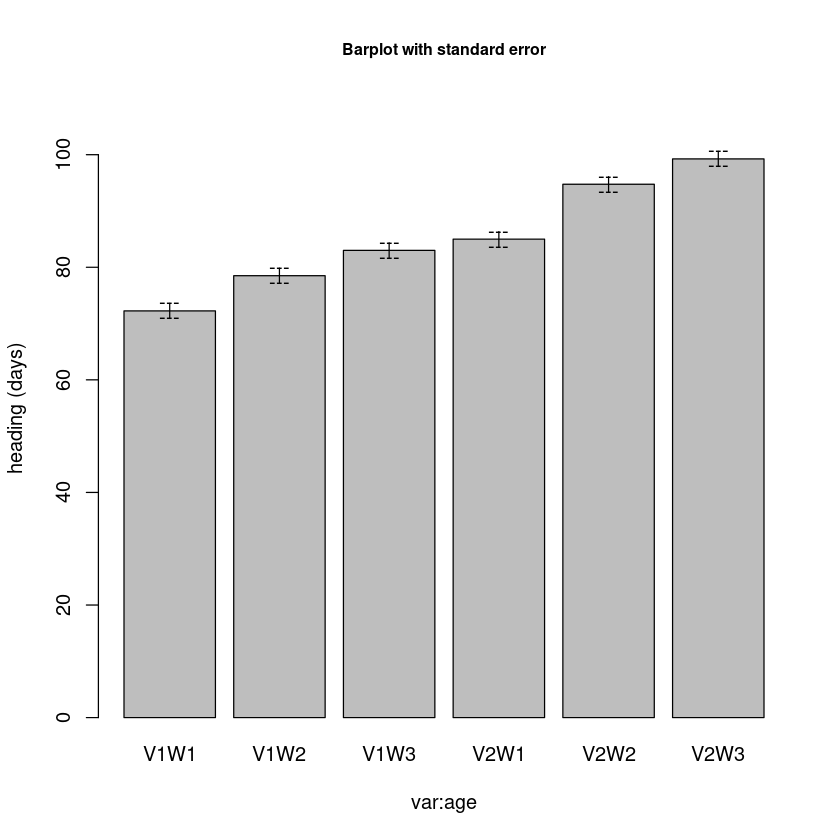

In [37]:
# Main plot factor (varieties)
bar.err(out3$means, 
        variation = "SE", 
        ylim = c(0, 110),
        names.arg = c("V1W1","V1W2", "V1W3", "V2W1", "V2W2", "V2W3"))


# Adding title, X and Y labels
title(main = "Barplot with standard error",
      cex.main = 0.8,
      xlab = "var:age", 
      ylab = "heading (days)")